<a href="https://colab.research.google.com/github/Mounia-ch/louder_hands/blob/Data_exploration/Baseline_Model_first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.backend import expand_dims
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

**Import MNIST dataset in CSV format**

In [ ]:
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/MyDrive/Louder_Hands/data/mnist/'

In [ ]:
 # Import train data csv format
train_data = pd.read_csv(path + 'sign_mnist_train.csv')
train_data.shape

(27455, 785)

In [ ]:
train_data.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149


In [ ]:
#X_train creation
X_train = train_data.drop(columns = 'label')
X_train.shape

(27455, 784)

In [ ]:
 # Import test data csv format
test_data = pd.read_csv(path + 'sign_mnist_test.csv')
test_data.shape

(7172, 785)

In [ ]:
test_data.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180


In [ ]:
#X_test creation
X_test = test_data.drop(columns = 'label')
X_test.shape

(7172, 784)

In [ ]:
#cheking for missing values
X_train.isnull().sum()

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 784, dtype: int64

**Checking target's balance_train_Data**

In [ ]:
#Y_train creation
y_train = train_data['label']
np.unique(y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 array([1126, 1010, 1144, 1196,  957, 1204, 1090, 1013, 1162, 1114, 1241,
        1055, 1151, 1196, 1088, 1279, 1294, 1199, 1186, 1161, 1082, 1225,
        1164, 1118]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


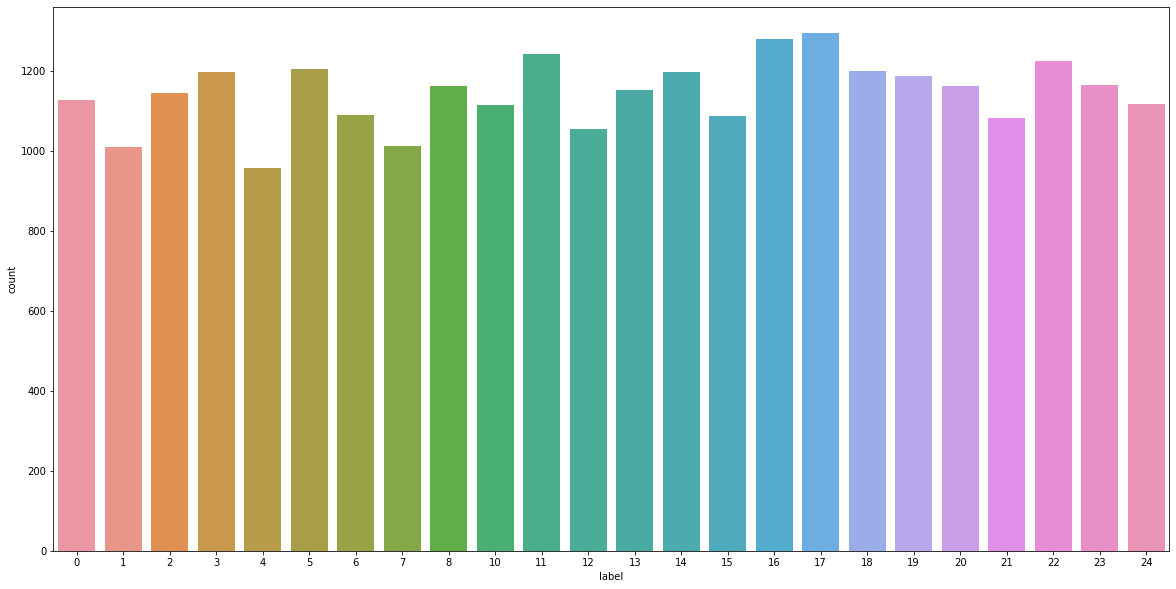

In [ ]:
# Visualizing the inbalance of the target
plt.figure(figsize=(20,10))
sns.countplot(y_train)

**Checking target_test_Data**

In [ ]:
#Y_test creation
y_test = test_data['label']
np.unique(y_test, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 array([331, 432, 310, 245, 498, 247, 348, 436, 288, 331, 209, 394, 291,
        246, 347, 164, 144, 246, 248, 266, 346, 206, 267, 332]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


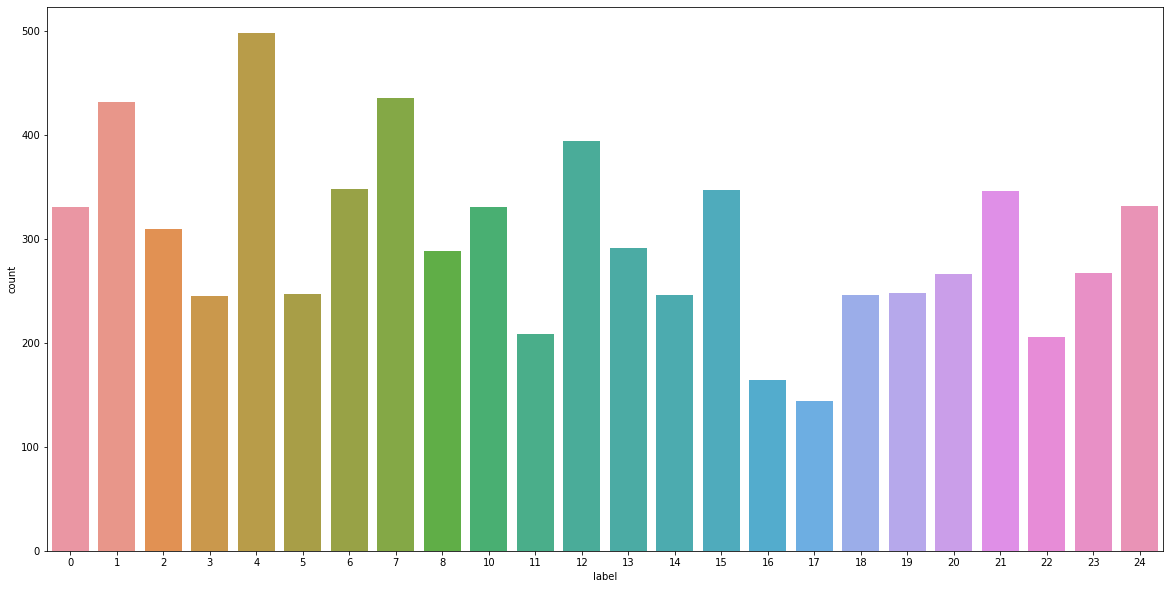

In [ ]:
# Visualizing the inbalance of the target
plt.figure(figsize=(20,10))
sns.countplot(y_test)

**Reshaping_Images**

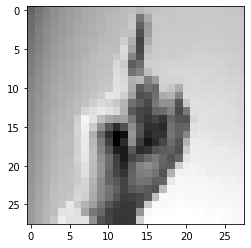

In [ ]:
#Reshaping Images_train_set
images_train = np.array([np.reshape(i,(28,28)) for i in X_train.values])
plt.imshow(images_train[0], cmap='gray')

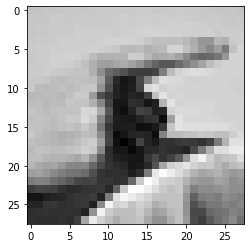

In [ ]:
#Reshaping Images_test_set
images_test = np.array([np.reshape(i,(28,28)) for i in X_test.values])
plt.imshow(images_test[0], cmap='gray')

**Encoding target**

In [ ]:
#Encoding target_train
encoder = OneHotEncoder(sparse = False)
y_train_encoded = encoder.fit_transform (pd.DataFrame(y_train))

In [ ]:
y_train_encoded.shape

(27455, 24)

In [ ]:
#Encoding target_test
y_test_encoded = encoder.transform (pd.DataFrame(y_test))

**Expanding_dim**

In [ ]:
# Expanding_dim_train
X_train_reshaped = expand_dims(images_train)
X_train_reshaped.shape

TensorShape([27455, 28, 28, 1])

In [ ]:
# Expanding_dim_test
X_test_reshaped = expand_dims(images_test)
X_test_reshaped.shape

TensorShape([7172, 28, 28, 1])

**Building the model**

In [ ]:
#Initializing_model
def initialize_model():
    model = models.Sequential()
    model.add(Rescaling(1./255, input_shape=(28,28,1)))
    model.add(layers.Conv2D(96, (4,4), activation = 'relu', padding = 'same'))
    model.add(layers.MaxPool2D(pool_size = (2,2)))
    model.add(layers.Conv2D(164, (3,3), activation = 'relu', padding = 'same'))
    model.add(layers.MaxPool2D(pool_size = (2,2)))
    model.add(layers.Conv2D(96, (2,2), activation = 'relu', padding = 'same'))
    model.add(layers.MaxPool2D(pool_size = (2,2)))
    model.add(layers.Conv2D(64, (2,2), activation = 'relu', padding = 'same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation = 'relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(24, activation = 'softmax'))
    return model

In [ ]:
#Compiling the model
def compile_model(model):
  model.compile( loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')
  return model

In [ ]:
#fit the model
model = initialize_model()
model = compile_model(model)
es = EarlyStopping( patience = 5, restore_best_weights = True)
history = model.fit(X_train_reshaped, y_train_encoded, validation_split = 0.3, epochs =200, batch_size = 32, callbacks = [es])

Epoch 1/200
601/601 [==============================] - 7s 8ms/step - loss: 2.0859 - accuracy: 0.3487 - val_loss: 0.6255 - val_accuracy: 0.8110
Epoch 2/200
601/601 [==============================] - 4s 6ms/step - loss: 0.6854 - accuracy: 0.7584 - val_loss: 0.1251 - val_accuracy: 0.9737
Epoch 3/200
601/601 [==============================] - 4s 6ms/step - loss: 0.3890 - accuracy: 0.8611 - val_loss: 0.0745 - val_accuracy: 0.9854
Epoch 4/200
601/601 [==============================] - 4s 6ms/step - loss: 0.2756 - accuracy: 0.9017 - val_loss: 0.0180 - val_accuracy: 0.9989
Epoch 5/200
601/601 [==============================] - 5s 9ms/step - loss: 0.2078 - accuracy: 0.9276 - val_loss: 0.0108 - val_accuracy: 0.9994
Epoch 6/200
601/601 [==============================] - 4s 7ms/step - loss: 0.1752 - accuracy: 0.9384 - val_loss: 0.0124 - val_accuracy: 0.9994
Epoch 7/200
601/601 [==============================] - 4s 6ms/step - loss: 0.1489 - accuracy: 0.9482 - val_loss: 0.0075 - val_accuracy: 0.9989

In [ ]:
#model_summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 96)        1632      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 164)       141860    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 164)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 96)          6

In [ ]:
#plotting function
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(-0.1, 2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.2)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f58dc2be7d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f58dc2e06d0>)

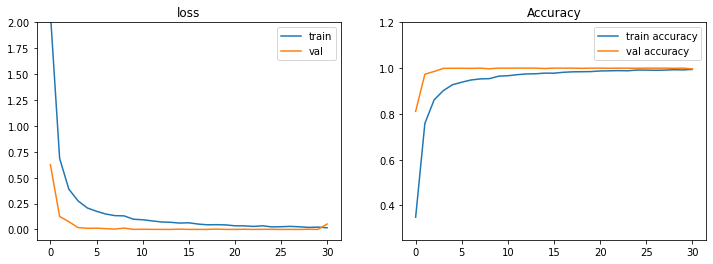

In [ ]:
#visualizing_fitting_results (first_model)
plot_history(history)

In [ ]:
#evaluate the model
model.evaluate(X_test_reshaped, y_test_encoded)

225/225 [==============================] - 1s 4ms/step - loss: 0.4630 - accuracy: 0.9279


[0.46300625801086426, 0.9279140830039978]

In [ ]:
#model_prediction
y_pred_encoded = model.predict(X_test_reshaped)

225/225 [==============================] - 1s 2ms/step


**Plotting_Confusion_Matrix**

In [ ]:
y_pred= encoder.inverse_transform(y_pred_encoded)
Y_pred_ref = pd.Series(y_pred.flatten())

In [ ]:
import string
alphabet = list(string.ascii_lowercase)

In [ ]:
labels = ['a','b','c','d','e','f','g','h','i','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y']

(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5842f31a90>)

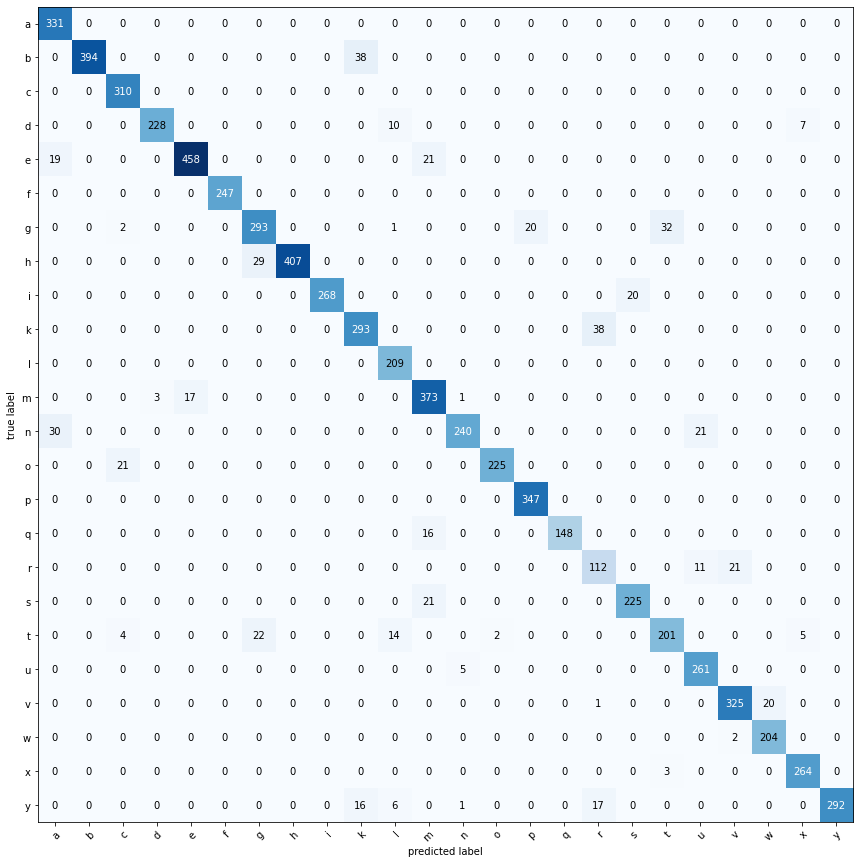

In [ ]:
mat = confusion_matrix(y_test, Y_pred_ref)
plot_confusion_matrix(conf_mat=mat,figsize=(15,15),class_names=labels, show_normed=False)

**Get Accuracy for each letter**

In [ ]:
#Calculating the accuracy for each class
per_class_accuracies = {}
classes = [0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
for idx, cls in enumerate(classes):
    true_negatives = np.sum(np.delete(np.delete(mat, idx, axis=0), idx, axis=1))
    true_positives = mat[idx, idx]
    # The accuracy for the current class is ratio between correct predictions to all predictions
    per_class_accuracies[cls] = (true_positives + true_negatives) / np.sum(mat)

In [ ]:
per_class_accuracies

{0: 0.9931678750697156,
 1: 0.9947016174010039,
 2: 0.9962353597322923,
 3: 0.9972113775794758,
 4: 0.9920524261015059,
 5: 1.0,
 6: 0.9852203011712214,
 7: 0.9959564974902398,
 8: 0.9972113775794758,
 10: 0.9871723368655884,
 11: 0.9956776352481874,
 12: 0.9889849414389291,
 13: 0.9919129949804797,
 14: 0.9967930842163971,
 15: 0.9972113775794758,
 16: 0.9977691020635806,
 17: 0.9877300613496932,
 18: 0.9942833240379253,
 19: 0.9885666480758505,
 20: 0.9948410485220301,
 21: 0.9938650306748467,
 22: 0.9969325153374233,
 23: 0.9979085331846068,
 24: 0.9944227551589515}

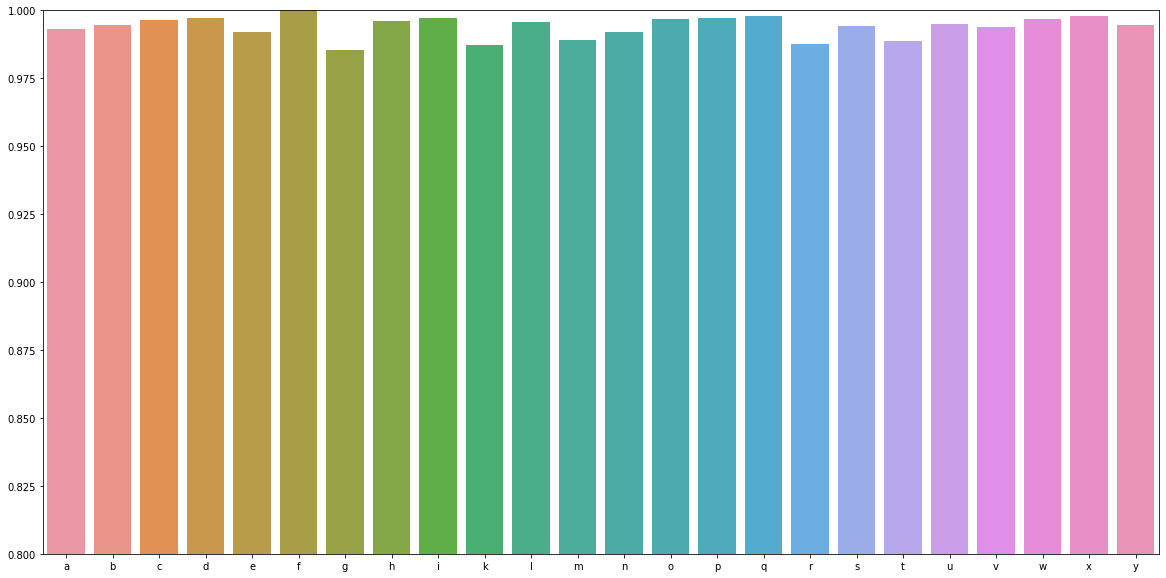

In [ ]:
plt.figure(figsize=(20,10))
#keys = list(per_class_accuracies.keys())
vals = list(per_class_accuracies.values())
plt.ylim(0.8, 1)
sns.barplot(x=labels, y=vals,)